In [161]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime 
from datetime import timedelta
from sklearn.metrics import mean_squared_error
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

In [162]:
%cd

C:\Users\Robin G


In [163]:
#Reading all files 
store=pd.read_csv('stores.csv')
feature=pd.read_csv('features.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [164]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [165]:
store.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


# Missing value Treatment

In [166]:
#finding null values in feature file
feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [167]:
#checking null values for file store
store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [168]:
#filling null value by mean for unemployement and cpi
feature['Unemployment'].fillna(feature['Unemployment'].mean(),inplace=True)
feature['CPI'].fillna(feature['CPI'].mean(),inplace=True)

In [169]:
#filling null value by zero for markdowns
feature['MarkDown1'] = feature['MarkDown1'].fillna(0)
feature['MarkDown2'] = feature['MarkDown2'].fillna(0)
feature['MarkDown3'] = feature['MarkDown3'].fillna(0)
feature['MarkDown4'] = feature['MarkDown4'].fillna(0)
feature['MarkDown5'] = feature['MarkDown5'].fillna(0)

In [170]:
feature.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


In [171]:
#checking for null value again if any left
feature.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

# Merging the data

In [172]:
#merging feature and train
data = pd.merge(feature, train, on=['Store','Date','IsHoliday'], how='inner')

In [173]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


In [174]:
#merging store also
training = pd.merge(data, store, how='inner',on=['Store'])

In [175]:
#checking data after merging
training.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


# Conversion of categorical data with numerical by making dummies

In [176]:
#covert categorical into numerical in Type (A,B,C)
tp = pd.get_dummies(training.Type)

In [177]:
#removing type column and stick with its A,B,C types.
training = pd.concat([training, tp], axis=1)
training = training.drop(columns='Type')

In [178]:
training.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,A,B,C
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,151315,1,0,0
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,151315,1,0,0


In [179]:
#covert categorical into numerical in isholiday (false=0,true=1)

type_mapping = {False: 0, True: 1}
training['IsHoliday'] = training['IsHoliday'].map(type_mapping)

In [180]:
print (training.IsHoliday.value_counts())

0    391909
1     29661
Name: IsHoliday, dtype: int64


In [181]:
training["IsHoliday"].head(2)

0    0
1    0
Name: IsHoliday, dtype: int64

# Date Features

In [182]:
training['Date'] = pd.to_datetime(training['Date'])

In [183]:
# Extract date features
training['Date_dayofweek'] =training['Date'].dt.dayofweek
training['Date_month'] =training['Date'].dt.month 
training['Date_year'] =training['Date'].dt.year
training['Date_day'] =training['Date'].dt.day

 - Making New Holiday Variable Based on Christmas.

In [184]:
training['Christmas'] = np.where((training['Date']==datetime(2010, 12, 31)) |
                              (training['Date']==datetime(2011, 12, 30)) | 
                              (training['Date']==datetime(2012, 12, 28)) | 
                              (training['Date']==datetime(2013, 12, 27)),1,0)

In [185]:
#dropping date variable
training = training.drop(columns='Date')

[]

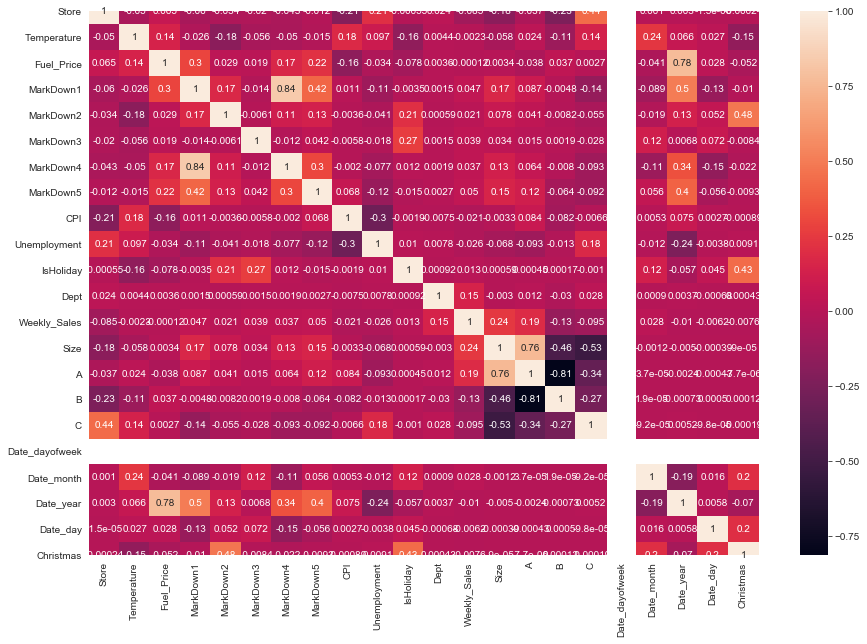

In [186]:
#Checking assumption for correlation.
corr = training.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

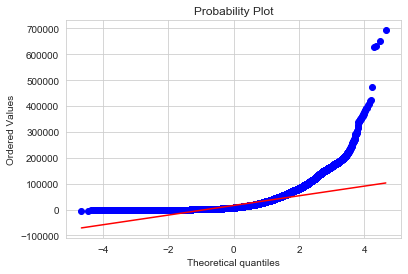

In [187]:
# Now checking residuals
from scipy import stats
import pylab

stats.probplot(training.Weekly_Sales, dist="norm", plot=pylab )
pylab.show()

# Splitting data in to train and test

In [188]:
train_x,test_x,train_y,test_y = train_test_split(training,training['Weekly_Sales'],test_size =0.2,random_state=32)

# Building models & comparing their RMSE values

# 1) Linear regression

In [189]:
Linear = linear_model.LinearRegression(normalize=True)
Linear.fit(train_x, train_y)
pred_y = Linear.predict(test_x)

In [190]:
print(mean_absolute_error(test_y, pred_y))
print(np.sqrt(mean_squared_error(test_y, pred_y)))
print(mean_squared_error(test_y, pred_y))
accuracy=Linear.score(test_x, test_y)
print(accuracy)

1.6003213946869844e-11
2.049114886896211e-11
4.1988718196996724e-22
1.0


# 2) Decision Tree

In [191]:
DecisionTreeRegressor?

In [192]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=5, min_samples_leaf=2)
dt.fit(train_x, train_y)
y_pred_dt= dt.predict(test_x)
acc_dt = round( dt.score(train_x, train_y) * 100, 2)
print (str(acc_dt) + ' percent')

100.0 percent


# 3) Random Forest

In [193]:
dt = RandomForestRegressor(n_estimators=10, max_depth=5,min_samples_split=2,min_samples_leaf=1)
dt.fit(train_x, train_y)
y_pred_rf=dt.predict(test_x)
acc_rf= round(dt.score(train_x, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 

